# Computer vision using Convoluted Neural Networks

In this post, we will see how to use Keras to build Convolutional Neural Networks to predict what’s inside a small image. We will go through the full Deep Learning pipeline, from:
- Exploring and Processing the Data
- Building and Training our Convolutional Neural Network
- Testing out with your own images

The original aritcle for this demo is here - https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce

A full notebook is provided here - 
https://github.com/josephlee94/intuitive-deep-learning/blob/master/Part%202:%20Image%20Recognition%20CIFAR-10/Coding%20Companion%20to%20Intuitive%20Deep%20Learning%20Part%202%20(Annotated).ipynb

In this post, we will use the CIFAR-10 dataset. The details of the dataset are as follows:
- Images to be recognized: Tiny images of 32 * 32 pixels
- Labels: 10 possible labels (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck)
- Dataset size: 60000 images, split into 50000 for training and 10000 for testing

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import pickle

### Import Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [3]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


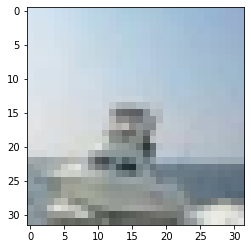

In [4]:
img = plt.imshow(x_train[100])


In [5]:
print('The label is:', y_train[100])

The label is: [8]


##### Label processing

What we really want is the probability of each of the 10 different classes. For that, we need 10 output neurons in our neural network. Since we have 10 output neurons, our labels must match this as well.

To do this, we convert the label into a set of 10 numbers where each number represents if the image belongs to that class or not. So if an image belongs to the first class, the first number of this set will be a 1 and all other numbers in this set will be a 0. This is called a one-hot encoding,

In [6]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

##### Image processing

A common step we do is to let the values to be between 0 and 1, which will aid in the training of our neural network. Since our pixel values already take the values between 0 and 255, we simply need to divide by 255.

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

#### Network Architecture

![alt text](architecture.png "Architecture")

We will be building a more complex Convoluted Neural Network with multiple layers..

Call an empty 'sequenctial' model to build the layers in...

- Layer 1 - a conv layer with filter size 3x3, stride size 1 (in both dimensions), and depth 32 (with input shape)
- Layer 2 - a conv layer with filter size 3x3, stride size 1, and depth 32.
- Layer 3 - a max pooling layer with pool size 2 x 2 and stride 2
- Layer 4 - a dropout layer with probability 0.25 of dropout so as to prevent overfitting
- Layer 5 - a conv layer with filter size 3x3, stride size 1, and depth 64
- Layer 6 - a conv layer with filter size 3x3, stride size 1, and depth 64
- Layer 7 - a max pooling layer with pool size 2 x 2 and stride 2
- Layer 8 - a dropout layer with probability 0.25 of dropout so as to prevent overfitting
- Layer 9 - a fully connected layer where our neurons are spatially arranged in a cube-like format rather than in just one row (using Flatten())
- Layer 10 - a dense (FC) layer of 512 neurons with relu activation
- Layer 11 - a dropout layer with probability 0.25 of dropout so as to prevent overfitting
- Layer 12 - a dense (FC) layer with 10 neurons and softmax activation

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [27]:
model = Sequential()

In [28]:
#Build up the layers of the model
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 64)         

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 382s 10ms/step - loss: 1.6011 - accuracy: 0.4133 - val_loss: 1.1926 - val_accuracy: 0.5710
Epoch 2/20
40000/40000 [==============================] - 418s 10ms/step - loss: 1.1895 - accuracy: 0.5730 - val_loss: 1.1104 - val_accuracy: 0.6157
Epoch 3/20
40000/40000 [==============================] - 391s 10ms/step - loss: 1.0220 - accuracy: 0.6390 - val_loss: 0.9508 - val_accuracy: 0.6676
Epoch 4/20
40000/40000 [==============================] - 404s 10ms/step - loss: 0.9063 - accuracy: 0.6810 - val_loss: 0.8633 - val_accuracy: 0.6974
Epoch 5/20
40000/40000 [==============================] - 497s 12ms/step - loss: 0.8234 - accuracy: 0.7079 - val_loss: 0.7801 - val_accuracy: 0.7242
Epoch 6/20
40000/40000 [==============================] - 440s 11ms/step - loss: 0.7622 - accuracy: 0.7306 - val_loss: 0.7662 - val_accuracy: 0.7291
Epoch 7/20
40000/40000 [==============================] 

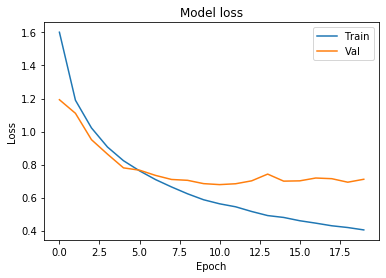

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'

In [38]:
filename = 'M1.sav'
pickle.dump(model, open(filename, 'wb'))

In [39]:
loaded_model = pickle.load(open(filename, 'rb'))